In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("./train.csv")
data = df.copy()
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Kmeans 

Applying Kmeans based on the most efficient 3 features 

In [3]:
imp3features = ['Online boarding', 'Inflight wifi service',"Type of Travel"]
df[imp3features].head()

,Online boarding,Inflight wifi service,Type of Travel
0,3,3,Personal Travel
1,3,3,Business travel
2,5,2,Business travel
3,2,2,Business travel
4,5,3,Business travel


In [4]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])
df[imp3features].head()

,Online boarding,Inflight wifi service,Type of Travel
0,3,3,1
1,3,3,0
2,5,2,0
3,2,2,0
4,5,3,0


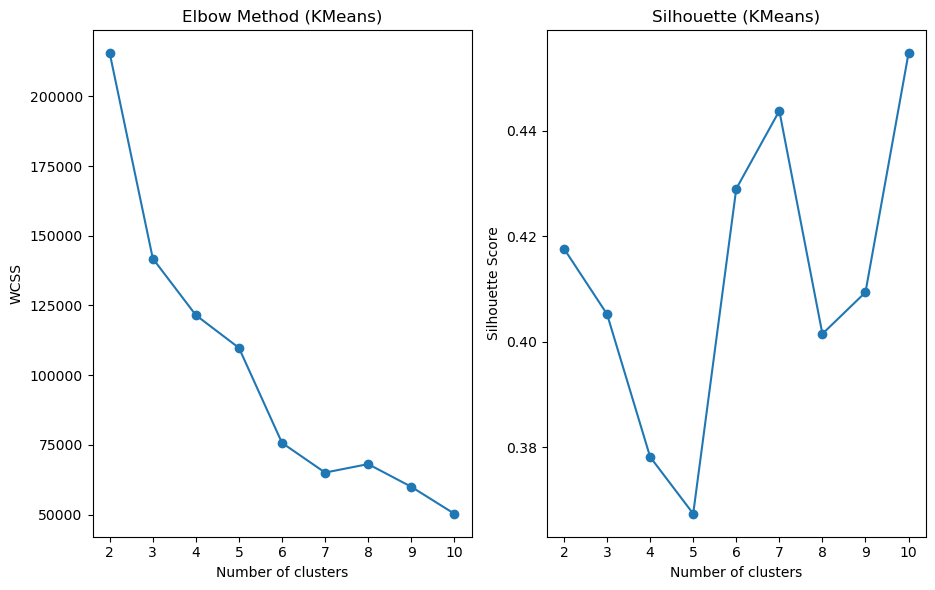

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = df[imp3features]

# KMeans: WCSS + Silhouette
wcss = []
sil_kmeans = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    sil_kmeans.append(silhouette_score(X, kmeans.labels_))


# Plot results
plt.figure(figsize=(14, 6))

# KMeans WCSS
plt.subplot(1, 3, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method (KMeans)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# KMeans Silhouette
plt.subplot(1, 3, 2)
plt.plot(range(2, 11), sil_kmeans, marker='o')
plt.title('Silhouette (KMeans)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()


In [8]:
kmeans = KMeans(n_clusters=7, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)
data.to_csv('./clustered_data.csv', index=False)

### WCSS (Within-Cluster Sum of Squares) for K-Means
$$
WCSS = \sum_{j=1}^{k} \sum_{x_i \in C_j} \| x_i - \mu_j \|^2
$$

### Silhouette Score
$$
s(i) = \frac{b(i) - a(i)}{\max \big( a(i), \, b(i) \big)}
$$


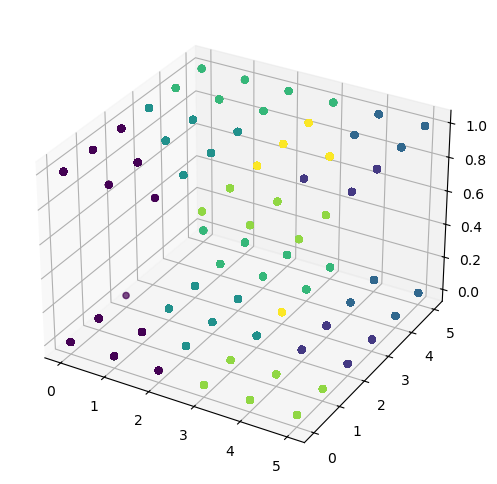

In [13]:
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting

# 3D Scatter Plot of Clusters
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
scatter = ax.scatter(
    df[imp3features[0]],
    df[imp3features[1]],
    df[imp3features[2]],
    c=data['Cluster'], 
    cmap='viridis',
    alpha=0.7
)

In [14]:
data.to_excel('./clustered_data.xlsx', index=False)